Prepara el MNIST data set per ser utilitzat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


np.random.seed(0)

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


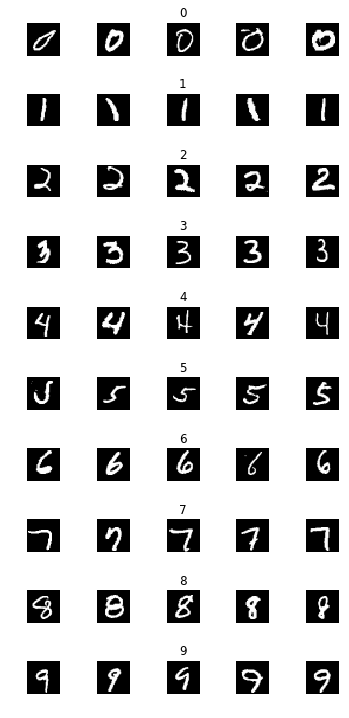

In [4]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


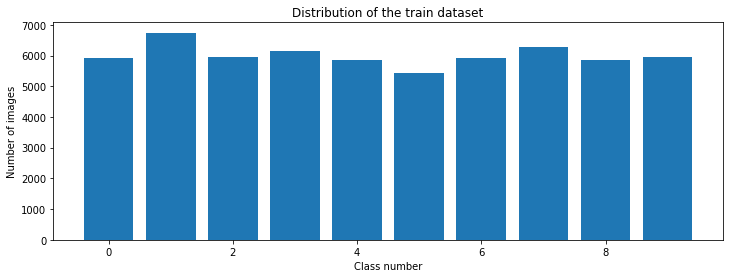

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [8]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [11]:
#define LeNet model function
def leNet_model():
    model = Sequential()
#     Not using padding in  first conv, layer due to MNIST being numbers centered, therefore the borders do not have information: 'build-in padding'
    model.add(Conv2D(30, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total para

In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 38s 706us/step - loss: 0.2010 - acc: 0.9341 - val_loss: 0.0543 - val_acc: 0.9833
Epoch 2/10
54000/54000 [==============================] - 35s 639us/step - loss: 0.0466 - acc: 0.9855 - val_loss: 0.0484 - val_acc: 0.9867
Epoch 3/10
54000/54000 [==============================] - 37s 679us/step - loss: 0.0375 - acc: 0.9880 - val_loss: 0.0510 - val_acc: 0.9862
Epoch 4/10
54000/54000 [==============================] - 42s 778us/step - loss: 0.0318 - acc: 0.9898 - val_loss: 0.0426 - val_acc: 0.9875
Epoch 5/10
54000/54000 [==============================] - 43s 797us/step - loss: 0.0311 - acc: 0.9903 - val_loss: 0.0432 - val_acc: 0.9882
Epoch 6/10
54000/54000 [==============================] - 43s 797us/step - loss: 0.0224 - acc: 0.9930 - val_loss: 0.0473 - val_acc: 0.9885
Epoch 7/10
54000/54000 [==============================] - 42s 774us/step - loss: 0.0234 - acc: 0.9924 - val_loss: 0.0

Text(0.5, 0, 'epoch')

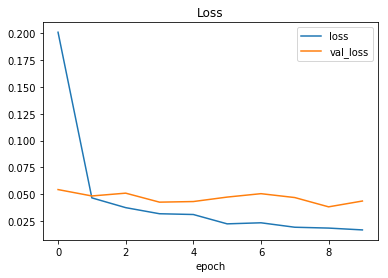

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

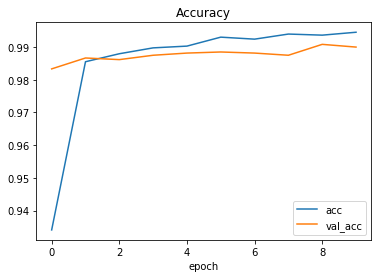

In [16]:
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

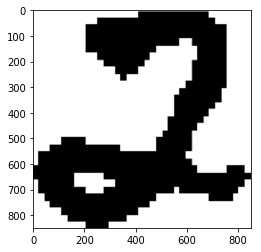

In [17]:
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

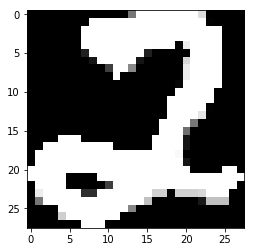

In [18]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [20]:
img = img/255
img = img.reshape(1, 28,28,1)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.05474605900632214
Test accuracy:  0.9866


Whenever validation error is higher than training error, we can say there is overfitting (as above).
Then there is the dropout, a technique that cancels randomly some of the nodes in the CNN in every iteration, making the other nodes more independent at the time of finding features.
This only occurs during training data.

In [23]:
from keras.layers import Dropout

In [25]:
#define LeNet model function with dropout
# the dropout is usually between the fully connected layers, as there are more parameters to update.
def leNet_model_dropout():
    model = Sequential()
#     Not using padding in  first conv, layer due to MNIST being numbers centered, therefore the borders do not have information: 'build-in padding'
    model.add(Conv2D(30, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
#     0.5 -> 50% of dropout, is the value that researchers that came with dropout reccommend
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
model = leNet_model_dropout()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 37s 690us/step - loss: 0.2173 - acc: 0.9292 - val_loss: 0.0591 - val_acc: 0.9817
Epoch 2/10
54000/54000 [==============================] - 35s 650us/step - loss: 0.0728 - acc: 0.9774 - val_loss: 0.0491 - val_acc: 0.9872
Epoch 3/10
54000/54000 [==============================] - 35s 646us/step - loss: 0.0568 - acc: 0.9823 - val_loss: 0.0348 - val_acc: 0.9897
Epoch 4/10
54000/54000 [==============================] - 43s 788us/step - loss: 0.0511 - acc: 0.9843 - val_loss: 0.0339 - val_acc: 0.9915
Epoch 5/10
54000/54000 [==============================] - 43s 792us/step - loss: 0.0466 - acc: 0.9857 - val_loss: 0.0279 - val_acc: 0.9918
Epoch 6/10
54000/54000 [==============================] - 42s 783us/step - loss: 0.0392 - acc: 0.9879 - val_loss: 0.0317 - val_acc: 0.9910
Epoch 7/10
54000/54000 [==============================] - 42s 781us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0

Text(0.5, 0, 'epoch')

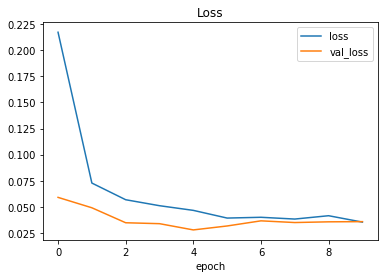

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

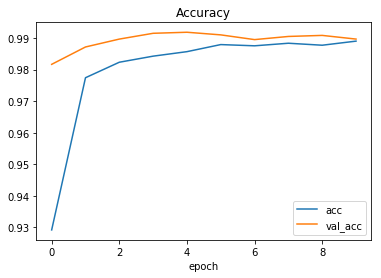

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.04096552454344946
Test accuracy:  0.9893


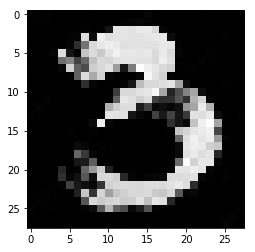

In [29]:
import requests
from PIL import Image
 
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [30]:
img = img/255
img = img.reshape(1, 28,28,1)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [3]


We want to visualize the kernels used in the convolutional layers to better understand the features extracted in each leayer

In [32]:
from keras.models import Model

In [37]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


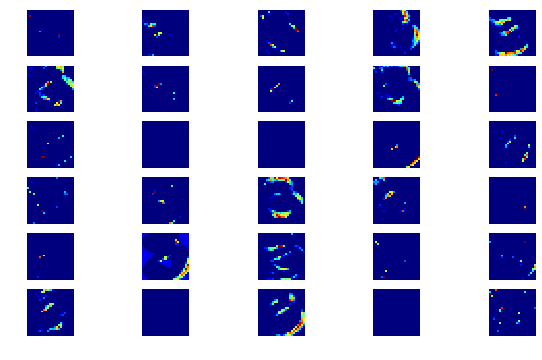

In [38]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

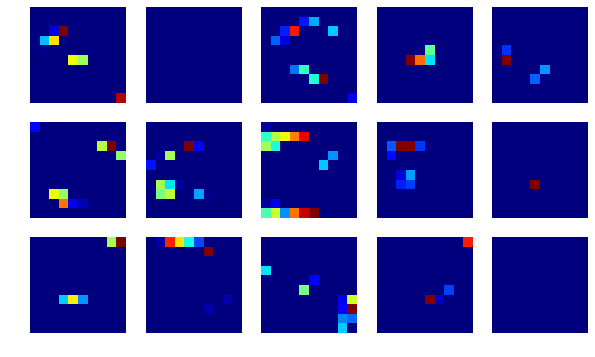

In [39]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')